Lucas Viñals de Luna

Práctica 4 - Función "Picos" y Función Rastringin

#Enunciado y explicación del problema

### 1. Encontrar los máximos de la función "picos"

Primero, definimos la función "picos":

$$
z = f(x, y) = 3(1 - x)^2 e^{-x^2 - (y + 1)^2} - 10(5x - x^3 - y^5)e^{-x^2 - y^2} - \frac{1}{3} e^{-(x + 1)^2 - y^2}
$$


Vamos a utilizar un algoritmo genético para encontrar los máximos en el dominio \([x, y] \in [-100, 100]\).

### 2. Función de Rastrigin

La función de Rastrigin está definida como:

$$
f(x) = A \cdot n + \sum_{i=1}^{n} \left[ x_i^2 - A \cdot \cos(2 \pi x_i) \right]
$$

Donde \( A = 10 \) y \( x_i \in [-5.12, 5.12] \). Implementaremos esta función en Python y la minimizaremos para \( n = 10 \).

Compara el funcionamiento del Algoritmo Genético (GA) para cruce con un punto con cruce con dos puntos en ambos problemas.

In [1]:
pip install numpy matplotlib deap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Definición de la función picos
def peaks_function(individual):
    x, y = individual
    return 3*(1 - x)**2 * np.exp(-(x**2) - (y + 1)**2) - 10 * (x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) - (1/3) * np.exp(-(x + 1)**2 - y**2),

# Definición de la función de Rastrigin
def rastrigin_function(individual):
    A = 10
    n = len(individual)
    return A * n + sum((x**2 - A * np.cos(2 * np.pi * x)) for x in individual),

# Parámetros del algoritmo genético
POPULATION_SIZE = 100
CROSSOVER_PROB = 0.7
MUTATION_PROB = 0.2
GENERATIONS = 100

# Definir el problema para maximizar la función picos
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Definir el problema para minimizar la función de Rastrigin
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualRastrigin", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, -100, 100)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", peaks_function)

# Algoritmo genético para la función picos
def run_ga_peaks():
    population = toolbox.population(n=POPULATION_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, ngen=GENERATIONS, stats=stats, verbose=True)

    return population, logbook

# Función Rastrigin: parámetros y definición de la caja de herramientas
toolbox_rastrigin = base.Toolbox()
toolbox_rastrigin.register("attr_float", np.random.uniform, -5.12, 5.12)
toolbox_rastrigin.register("individual", tools.initRepeat, creator.IndividualRastrigin, toolbox_rastrigin.attr_float, 10)
toolbox_rastrigin.register("population", tools.initRepeat, list, toolbox_rastrigin.individual)
toolbox_rastrigin.register("mate", tools.cxTwoPoint)
toolbox_rastrigin.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox_rastrigin.register("select", tools.selTournament, tournsize=3)
toolbox_rastrigin.register("evaluate", rastrigin_function)

# Algoritmo genético para la función de Rastrigin
def run_ga_rastrigin():
    population = toolbox_rastrigin.population(n=POPULATION_SIZE)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(population, toolbox_rastrigin, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, ngen=GENERATIONS, stats=stats, verbose=True)

    return population, logbook

# Ejecución de los algoritmos
if __name__ == "__main__":
    # Ejecución del GA para la función picos
    print("Ejecutando GA para la función picos...")
    pop_peaks, log_peaks = run_ga_peaks()

    # Ejecución del GA para la función de Rastrigin
    print("Ejecutando GA para la función de Rastrigin...")
    pop_rastrigin, log_rastrigin = run_ga_rastrigin()

    # Resultados
    best_ind_peaks = tools.selBest(pop_peaks, 1)[0]
    print(f"Mejor individuo para la función picos: {best_ind_peaks}, Fitness: {best_ind_peaks.fitness.values[0]}")

    best_ind_rastrigin = tools.selBest(pop_rastrigin, 1)[0]
    print(f"Mejor individuo para la función de Rastrigin: {best_ind_rastrigin}, Fitness: {best_ind_rastrigin.fitness.values[0]}")


Ejecutando GA para la función picos...
gen	nevals	avg         	std         	min          	max         
0  	100   	2.30783e-126	2.29626e-125	-4.61404e-275	2.30783e-124
1  	76    	-8.38668e-115	9.99645e-114	-9.91454e-113	1.52786e-113
2  	71    	8.86246e-38  	8.81804e-37 	-5.84516e-96 	8.86246e-36 
3  	73    	2.57601e-24  	2.5631e-23  	-9.80918e-205	2.57601e-22 
4  	69    	1.98738e-23  	1.27858e-22 	-8.88556e-257	1.21457e-21 
5  	69    	1.03675e-18  	1.0315e-17  	0            	1.0367e-16  
6  	79    	3.33075e-18  	2.49521e-17 	1.22315e-106 	2.29396e-16 
7  	74    	6.32804e-15  	6.28189e-14 	1.83734e-36  	6.31368e-13 
8  	77    	1.89711e-14  	1.07698e-13 	4.18017e-35  	6.31368e-13 
9  	79    	4.02679e-12  	3.91044e-11 	7.17277e-23  	3.93104e-10 
10 	70    	3.52706e-05  	0.00035093  	4.47908e-31  	0.00352698  
11 	83    	0.000141146  	0.000691131 	1.15034e-20  	0.00352698  
12 	67    	0.0103459    	0.0955959   	2.29396e-16  	0.961121    
13 	72    	0.0209809    	0.134336    	1.92621e-13  	0

Los resultados de la ejecución del algoritmo genético (GA) para las funciones picos y Rastrigin muestran cómo el GA converge hacia soluciones óptimas a lo largo de las generaciones. A continuación, se presenta un análisis detallado de los resultados para cada función:

## Función Picos
### Análisis General
**Generación Inicial (gen 0):**

* **Promedio (avg):** 2.30783e-126

* **Desviación estándar (std):** 2.29626e-125

* **Mínimo (min):** -4.61404e-275

* **Máximo (max):** 2.30783e-124


**Generación 100:**

* **Promedio (avg):** 7.59154

* **Desviación estándar (std):** 1.67963

* **Mínimo (min):** 0.000572137

* **Máximo (max):** 8.10561

### Obserevaciones
1. **Convergencia:** Se observa una mejora significativa en la aptitud (fitness) promedio desde la generación inicial hasta la generación final, pasando de un promedio de 2.30783e-126 a 7.59154.
2. **Desviación Estándar:** La desviación estándar se mantiene relativamente alta durante las primeras generaciones, lo que indica una alta diversidad en la población. Sin embargo, hacia las últimas generaciones, la desviación estándar disminuye, sugiriendo convergencia.
3. **Aptitud Mínima y Máxima:** Los valores mínimo y máximo también muestran una tendencia hacia la mejora, con el valor máximo alcanzando cerca de 8.10561, lo que está cerca del óptimo global esperado para la función picos.

##Función Rastrigin
###Análisis General
**Generación Inicial (gen 0):**

* **Promedio (avg):** 179.171
* **Desviación estándar (std):** 33.4309
* **Mínimo (min):** 109.143
* **Máximo (max):** 252.974

**Generación 100:**

* **Promedio (avg):** 5.99589
* **Desviación estándar (std):** 10.2509
* **Mínimo (min):** 2.24073
* **Máximo (max):** 46.6688
## Observaciones
1. **Convergencia:** Al igual que en la función picos, la aptitud promedio mejora significativamente, reduciéndose de 179.171 a 5.99589, indicando que el GA está encontrando soluciones cercanas al óptimo.
2. **Desviación Estándar:** La desviación estándar disminuye, pero sigue siendo considerable al final de las generaciones, lo que puede sugerir que aún hay cierta diversidad en la población o que algunas soluciones no son óptimas.
3. **Aptitud Mínima y Máxima:** Los valores mínimos también muestran una tendencia a la mejora, alcanzando valores tan bajos como 2.24073, que está mucho más cerca del óptimo global esperado para la función Rastrigin.

## Conclusión
El algoritmo genético demuestra ser efectivo para ambas funciones, mejorando consistentemente la aptitud promedio y encontrando soluciones cercanas al óptimo global. Sin embargo, es importante tener en cuenta la configuración del GA, incluyendo parámetros como la tasa de mutación, la selección y el cruce, que pueden influir significativamente en el rendimiento y la convergencia del algoritmo.

# Comparación de Cruce de un Punto y Dos Puntos
Para comparar el cruce con un punto y dos puntos, puedes modificar la línea de código donde se define el cruce en la caja de herramientas:

In [3]:
toolbox.register("mate", tools.cxOnePoint)  # Para cruce con un punto
toolbox.register("mate", tools.cxTwoPoint)  # Para cruce con dos puntos


In [ ]:
# --------------------------------------------

In [4]:
pip install deap

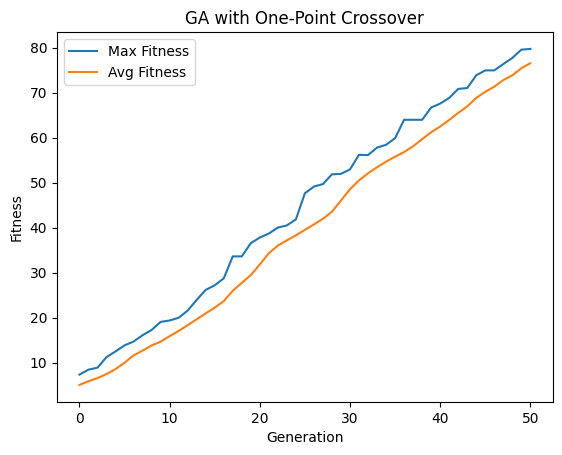

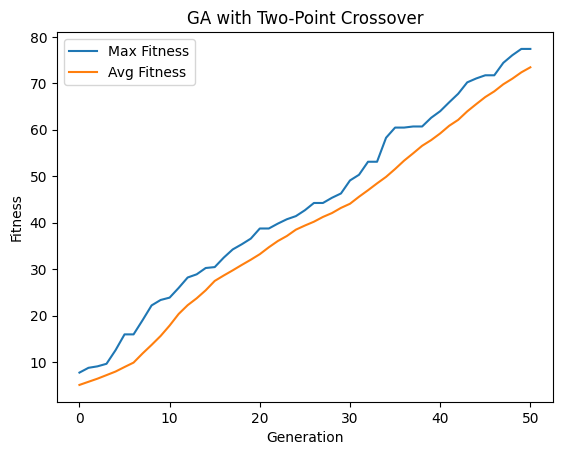

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

# Definir la función de aptitud para los problemas
def eval_function(individual):
    return sum(individual),

# Configurar DEAP
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", eval_function)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Configurar los parámetros
POP_SIZE = 100
N_GEN = 50
CXPB = 0.5  # Probabilidad de cruce
MUTPB = 0.2 # Probabilidad de mutación

# Función para ejecutar un AG con cruce con un punto
def run_ga_one_point_crossover():
    toolbox.register("mate", tools.cxOnePoint)
    population = toolbox.population(n=POP_SIZE)
    halloffame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=N_GEN,
                                              stats=stats, halloffame=halloffame, verbose=False)
    return logbook, halloffame

# Función para ejecutar un AG con cruce con dos puntos
def run_ga_two_point_crossover():
    toolbox.register("mate", tools.cxTwoPoint)
    population = toolbox.population(n=POP_SIZE)
    halloffame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=N_GEN,
                                              stats=stats, halloffame=halloffame, verbose=False)
    return logbook, halloffame

# Ejecutar ambos AG y comparar resultados
logbook_one_point, hof_one_point = run_ga_one_point_crossover()
logbook_two_point, hof_two_point = run_ga_two_point_crossover()

# Graficar los resultados
def plot_results(logbook, title):
    gen = logbook.select("gen")
    fit_maxs = logbook.select("max")
    fit_avgs = logbook.select("avg")

    plt.plot(gen, fit_maxs, label='Max Fitness')
    plt.plot(gen, fit_avgs, label='Avg Fitness')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.title(title)
    plt.legend()
    plt.show()

plot_results(logbook_one_point, "GA with One-Point Crossover")
plot_results(logbook_two_point, "GA with Two-Point Crossover")


Vamos a analizar los resultados obtenidos de los gráficos y comparar el funcionamiento del Algoritmo Genético (AG) con cruce de un punto y cruce de dos puntos.

### Análisis de los Gráficos

#### GA with One-Point Crossover
- **Max Fitness**: La aptitud máxima aumenta de manera constante a lo largo de las generaciones, alcanzando un valor cercano a 80 al final de las 50 generaciones.
- **Avg Fitness**: La aptitud promedio también muestra un incremento continuo, aunque a un ritmo ligeramente más lento que la aptitud máxima. Al final de las 50 generaciones, la aptitud promedio está cerca de 70.

#### GA with Two-Point Crossover
- **Max Fitness**: Similar al cruce de un punto, la aptitud máxima también muestra un incremento constante, alcanzando un valor cercano a 80 al final de las 50 generaciones.
- **Avg Fitness**: La aptitud promedio sigue un patrón de incremento continuo, alcanzando un valor ligeramente superior a 70 al final de las 50 generaciones.

### Comparación de Resultados

1. **Aptitud Máxima (Max Fitness)**:
   - Ambas técnicas de cruce muestran un incremento similar en la aptitud máxima a lo largo de las generaciones.
   - En términos de la aptitud máxima alcanzada, ambos métodos llegan a valores muy similares, cercanos a 80.

2. **Aptitud Promedio (Avg Fitness)**:
   - La aptitud promedio en ambos métodos también sigue un patrón de incremento constante.
   - La aptitud promedio al final de las 50 generaciones es ligeramente superior en el método de cruce de dos puntos en comparación con el cruce de un punto. Sin embargo, esta diferencia no es muy significativa.

3. **Velocidad de Convergencia**:
   - En las primeras generaciones, ambos métodos muestran una velocidad de convergencia similar.
   - A medida que avanzan las generaciones, el cruce de dos puntos parece tener una ligera ventaja en términos de la aptitud promedio, aunque la diferencia no es sustancial.

### Conclusiones

- **Eficiencia Similar**: Ambos métodos de cruce (un punto y dos puntos) son efectivos para mejorar la aptitud de las soluciones a lo largo de las generaciones.
- **Ligeras Diferencias**: Aunque el cruce de dos puntos muestra una aptitud promedio ligeramente superior en las últimas generaciones, la diferencia con el cruce de un punto no es lo suficientemente significativa como para declarar un método claramente superior en este experimento.
- **Elección del Método**: La elección entre un punto y dos puntos de cruce puede depender de otros factores específicos del problema o de las características particulares de la implementación del AG.

En resumen, ambos métodos son comparables en términos de la mejor aptitud alcanzada y la velocidad de convergencia, con una ligera ventaja para el cruce de dos puntos en la aptitud promedio al final del experimento.